In [108]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
df = pd.read_csv('../System Manager/Python/honda_sell_data.csv')

In [110]:
df.head(5)

,Year,Make,Model,Condition,Price,Consumer_Rating,Consumer_Review_#,Exterior_Color,Interior_Color,Drivetrain,Fuel_Type,Transmission,Engine,VIN,Stock_#,Mileage,State,Seller_Type
0,2023,Honda,Ridgeline RTL,New,"46,370",4.8,9,Platinum White Pearl,Beige,All-wheel Drive,Gasoline,Automatic,3.5L V6 24V GDI SOHC,5FPYK3F58PB011817,830164,10,CA,Dealer
1,2023,Honda,CR-V Hybrid Sport,New,"34,150",1.7,24,Platinum White Pearl,Black,FWD,Hybrid,Automatic CVT,2.0L I4 16V GDI DOHC Hybrid,2HKRS5H5XPH702953,6402953,–,CA,Dealer
2,2023,Honda,CR-V Hybrid Sport,New,"34,245",4.7,2869,Meteorite Gray Metallic,Black,Front-wheel Drive,Hybrid,Automatic CVT,2.0L I4 16V GDI DOHC Hybrid,2HKRS5H55PH704805,PH704805,1,CA,Dealer
3,2022,Honda,Pilot TrailSport,New,"46,500",5.0,12,Sonic Gray Pearl,Black,All-wheel Drive,Gasoline,9-Speed Automatic,3.5L V6 24V GDI SOHC,5FNYF6H82NB100429,5700429B,5,CA,Dealer
4,2023,Honda,CR-V Hybrid Sport Touring,New,"40,395",4.4,12,Crystal Black Pearl,Black,All-wheel Drive,Hybrid,Automatic CVT,2.0L I4 16V GDI DOHC Hybrid,2HKRS6H90PH805954,5705954,5,CA,Dealer


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4926 entries, 0 to 4925
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               4926 non-null   int64  
 1   Make               4926 non-null   object 
 2   Model              4926 non-null   object 
 3   Condition          4926 non-null   object 
 4   Price              4926 non-null   object 
 5   Consumer_Rating    4926 non-null   float64
 6   Consumer_Review_#  4926 non-null   int64  
 7   Exterior_Color     4926 non-null   object 
 8   Interior_Color     4926 non-null   object 
 9   Drivetrain         4926 non-null   object 
 10  Fuel_Type          4926 non-null   object 
 11  Transmission       4926 non-null   object 
 12  Engine             4926 non-null   object 
 13  VIN                4926 non-null   object 
 14  Stock_#            4926 non-null   object 
 15  Mileage            4926 non-null   object 
 16  State              4926 

In [112]:
print('Number of rows in the dataset =', df.shape[0])
print('Number of columns in the dataset =', df.shape[1])

Number of rows in the dataset = 4926
Number of columns in the dataset = 18


In [113]:
print('Number of null values in the dataset =', df.isnull().sum().sum())

Number of null values in the dataset = 0


In [114]:
df_num_col = df.select_dtypes(exclude=['object']).columns
df_num = df[df_num_col]

df_num.describe().T.style.background_gradient(cmap='Blues')

,count,mean,std,min,25%,50%,75%,max
Year,4926.000000,2020.573285,3.660048,1981.000000,2020.000000,2022.000000,2023.000000,2023.000000
Consumer_Rating,4926.000000,4.575741,0.542716,1.200000,4.500000,4.700000,4.900000,5.000000
Consumer_Review_#,4926.000000,1189.800041,1727.801953,0.000000,124.000000,671.000000,1664.000000,29258.000000


<Axes: >

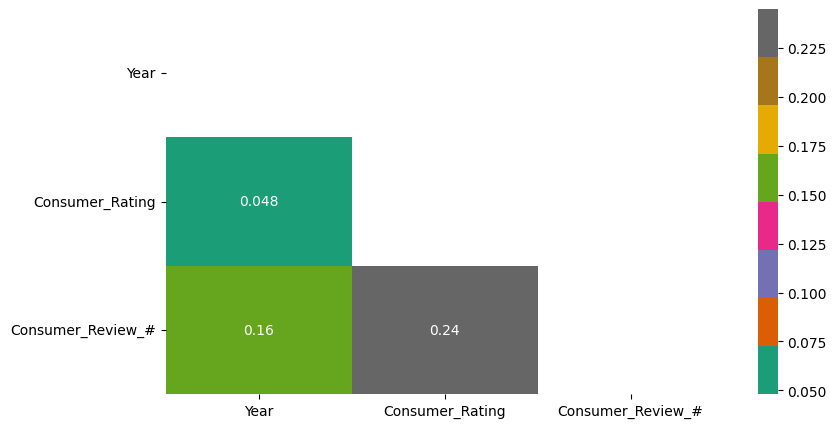

In [115]:
plt.figure(figsize=(9,5))
corr = df_num.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, cmap='Dark2')

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4926 entries, 0 to 4925
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               4926 non-null   int64  
 1   Make               4926 non-null   object 
 2   Model              4926 non-null   object 
 3   Condition          4926 non-null   object 
 4   Price              4926 non-null   object 
 5   Consumer_Rating    4926 non-null   float64
 6   Consumer_Review_#  4926 non-null   int64  
 7   Exterior_Color     4926 non-null   object 
 8   Interior_Color     4926 non-null   object 
 9   Drivetrain         4926 non-null   object 
 10  Fuel_Type          4926 non-null   object 
 11  Transmission       4926 non-null   object 
 12  Engine             4926 non-null   object 
 13  VIN                4926 non-null   object 
 14  Stock_#            4926 non-null   object 
 15  Mileage            4926 non-null   object 
 16  State              4926 

In [117]:
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [118]:
label_encoder = preprocessing.LabelEncoder()

encoded_model = label_encoder.fit_transform(df['Model'])
encoded_condition = label_encoder.fit_transform(df['Condition'])
encoded_ExtColour = label_encoder.fit_transform(df['Exterior_Color'])
encoded_IntColour = label_encoder.fit_transform(df['Interior_Color'])
encoded_Drivetrain = label_encoder.fit_transform(df['Drivetrain'])
encoded_FuelType = label_encoder.fit_transform(df['Fuel_Type'])
encoded_Transmission = label_encoder.fit_transform(df['Transmission'])
encoded_Engine = label_encoder.fit_transform(df['Engine'])

In [119]:
train_features = pd.DataFrame([encoded_model,
                               encoded_condition,
                               encoded_ExtColour,
                               encoded_IntColour,
                               encoded_Drivetrain,
                               encoded_FuelType,
                               encoded_Transmission,
                               encoded_Engine]).T

In [120]:
X_train,X_test,y_train,y_test = train_test_split(train_features, df['Consumer_Rating'], test_size=0.25, random_state=42)

In [121]:
multi_reg_model = linear_model.LinearRegression()

multi_reg_model.fit(X = X_train,
                    y = y_train)

print(multi_reg_model.intercept_)
print(multi_reg_model.coef_)


4.625024210795675
[ 2.58150504e-04 -3.44212075e-02 -8.91580304e-07  6.21082055e-04
  2.20444486e-02 -3.70765642e-02  1.86476240e-03  1.23848003e-03]


In [122]:
y_pred = multi_reg_model.predict(X_test)

In [123]:
# Calculate the mean squared error (MSE)
mse = np.mean((y_pred - y_test)**2)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(y_pred - y_test))
r2_score = multi_reg_model.score(X_test, y_test)

# Print the MSE
print('MSE on test set:', mse)
print('RMSE on test set:', rmse)
print('MAE on test set:', mae)
print('R2 score on test set:', r2_score)

MSE on test set: 0.2946605727329902
RMSE on test set: 0.5428264665001055
MAE on test set: 0.3509468729366714
R2 score on test set: -0.00510028048390776


In [124]:
data_point = train_features.iloc[2678:2685,:]
data_point

,0,1,2,3,4,5,6,7
2678,33,1,118,9,1,6,34,30
2679,100,1,107,28,4,5,5,50
2680,22,2,62,9,4,5,5,31
2681,31,2,164,57,1,6,34,33
2682,29,2,164,61,3,5,19,42
2683,110,1,126,9,1,5,29,50
2684,107,2,166,28,1,5,29,50


In [125]:
y_pred = multi_reg_model.predict(data_point)
y_pred

array([4.50474789, 4.60775574, 4.51790723, 4.50329675, 4.56960512,
       4.5771407 , 4.55370993])

In [126]:
check = df.iloc[2678:2685, : ]
check['Consumer_Rating']

2678    4.6
2679    4.6
2680    4.8
2681    4.7
2682    4.5
2683    4.7
2684    4.5
Name: Consumer_Rating, dtype: float64